# Mapping with `cartopy` and Colors

## Context

Yesterday we explored the exciting world of combining geospatial information with our pandas dataframe in the context of analysis and computations. Today we are going to now see what we can do with visualization when we have geospatial information. We are going to use the library `cartopy` to make maps and also explore some more visualization features of `matplotlib`.

Today are going to use a geodataframe of the NAAMES dataset.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
naames = pd.read_csv('./data/naames-mrg01-c130_merge_20151112_R5_thru20151114.csv', skiprows=223)

In [3]:
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})
# Create geodataframe
naames_gpd = gpd.GeoDataFrame(naames, 
                            geometry=gpd.points_from_xy(naames[' LONGITUDE'], naames[' LATITUDE']), 
                            crs='epsg:4326')

## `cartopy`

Yesterday we saw that for a quick visual we could use the `.plot()` function to look at our data on a latitude/longitude axis. This is nice and it is easy, but we lack context in this simplified view. 

<AxesSubplot:>

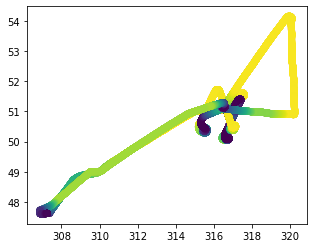

In [4]:
naames_gpd.plot(column=' ALTP')

To expand our map we are going to use `cartopy`. Some advantages of `cartopy` are:

- ability to reproject a dataset
- ability to plot data from different projections together
- ability to add features such as coastlines below your data, similar to a basemap


Let's see an example of using `cartopy` by re-creating the map above with some features below.

`cartopy` builds into the `matplotlib` OOP interface, so let's start by creating a map with `matplotlib` OOP.

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:>

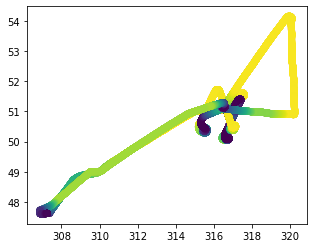

In [6]:
fig = plt.figure()
ax = plt.axes()

naames_gpd.plot(ax=ax, column=' ALTP')

Now the plot above doesn't use cartopy, it's just the same map as the geopandas version but plotted in a different way. To change to using cartopy we have to:
1. define our crs
2. convert our geopandas dataframe to that crs
2. add the crs as an argument to `plt.axes()`

The CRS we are going to use is called [`PlateCarree`](https://pro.arcgis.com/en/pro-app/2.8/help/mapping/properties/plate-carree.htm).

In [7]:
import cartopy.crs as ccrs

In [8]:
# Create the projection
crs = ccrs.PlateCarree()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
naames_platecarree = naames_gpd.to_crs(crs.proj4_init)


<GeoAxesSubplot:>

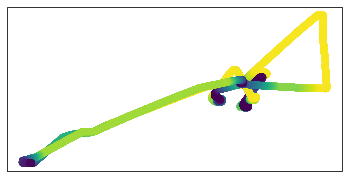

In [9]:
# Recreate the plot with the projection as an argument
fig = plt.figure()
ax = plt.axes(projection=crs)

naames_platecarree.plot(ax=ax, column=' ALTP')

So far it looks like we've taken a step backwards because we have lost our nice axis labels. We can add those back, however, using the `.gridlines()` method. Additionally, we can use the `.coastlines()` feature to add in the shape of the nearby continent. I'm also going to use `.set_extent()` to give us a bit broader view and a title for clarity.

Text(0.5, 1.0, 'Flight Track Altitude')

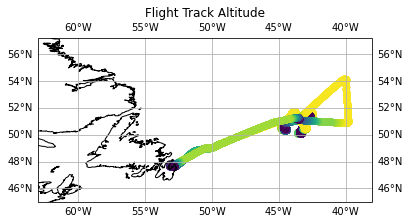

In [10]:
# Recreate the plot with the projection as an argument
fig = plt.figure()
ax = plt.axes(projection=crs)

# Add the data
naames_platecarree.plot(ax=ax, column=' ALTP')

# Change the field of view
ax.set_extent([-63, -38, 45, 57])
# Add labels and gridlines
ax.gridlines(crs=crs, draw_labels=True)
# Add the shape of the coast
ax.coastlines()

# Add a title
ax.set_title('Flight Track Altitude')


Looks nice! So with a bit of extra work we have converted out quick geopandas plot into a map with nice labels, gridlines and coastlines.

### `cartopy` Features

One of the nice built-in features of `cartopy` is that it can download and render features layers such as coastlines, rivers, and some political boundaries on your map. The example below shows how to use features with the pre-built `cartopy` features. [This example](https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/feature_creation.html) also shows how to create a custom feature.

In [11]:
import cartopy.feature as cfeature

Text(0.5, 1.0, 'Flight Track Altitude')

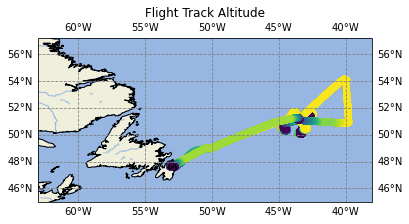

In [20]:
# Recreate the plot with the projection as an argument
fig = plt.figure()
ax = plt.axes(projection=crs)

# Add the data
naames_platecarree.plot(ax=ax, column=' ALTP')

# Change the field of view
ax.set_extent([-63, -38, 45, 57])
# Add labels and gridlines
ax.gridlines(crs=crs, color='grey', linestyle='--', draw_labels=True)

# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add a title
ax.set_title('Flight Track Altitude')


## Transforming Data

One of the nice parts of `cartopy` is that it lets you change your projection farily easily. To do this we will define a different starting projection, then run the same code again.

In [12]:
# Create the projection
crs = ccrs.AlbersEqualArea(-50, 52)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
naames_albers = naames_gpd.to_crs(crs.proj4_init)

Text(0.5, 1.0, 'Flight Track Altitude')

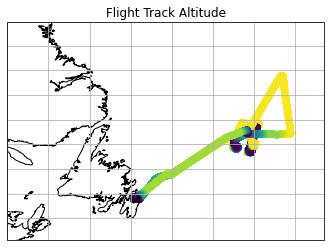

In [13]:
# Recreate the plot with the projection as an argument
fig = plt.figure()
ax = plt.axes(projection=crs)

# Add the data
naames_albers.plot(ax=ax, column=' ALTP')

# Change the field of view
ax.set_extent([-63, -38, 45, 57])
# Add labels and gridlines
ax.gridlines(crs=crs)
# Add the shape of the coast
ax.coastlines()

# Add a title
ax.set_title('Flight Track Altitude')

There are lots of projections and which one you want depends on where in the world you are. A full list of projections can be found [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

For flight track data the change in projection likely won't matter very much. Where this feature becomes useful is if you are plotting two data sources with different starting projections. If that is the case then we can use these features to convert the different sources to the same projection.

## Color in `matplotlib`

There are a variety of ways to deal with color and colorbars in `matplotlib`.

Firstly, color can be specified in several ways. When specifying a single color you can use RGB, hexadecimal, or sometimes by a written name. A full list of the options is [in the docs](https://matplotlib.org/stable/tutorials/colors/colors.html). Another useful tool is an online color picker. There are dozens of these available so try a couple to find your favorite. One I have used before is the [W3Schools Color Picker](https://www.w3schools.com/colors/colors_picker.asp).

<AxesSubplot:xlabel=' Fractional_Day', ylabel=' ALTP'>

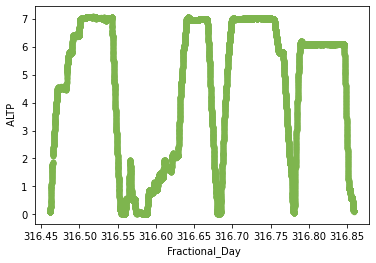

In [14]:
naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c='#7eb54e')  # hexadecimal color code
# naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c=(0.49, 0.75, 0.97))  # RGB color code

<AxesSubplot:xlabel=' Fractional_Day', ylabel=' ALTP'>

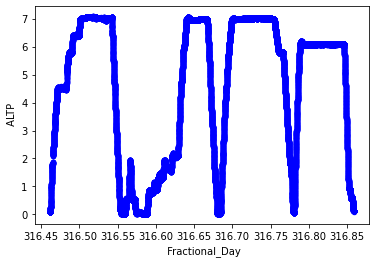

In [26]:
naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c='blue')

We have also seen that you can use another column to create the color for a scatter plot.

<AxesSubplot:xlabel=' Fractional_Day', ylabel=' ALTP'>

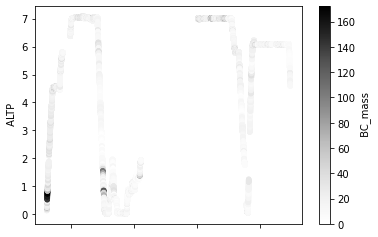

In [16]:
naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass')

Adding a color-based legend to a plot is called adding a colorbar. When adding a colorbar there are multiple components:
1. The values that are used to determine the color at that point
2. The colors that are going to be used for the range of values
These two things are two seperate inputs, `c` for the first one, and `cmap` for the second one.

<AxesSubplot:xlabel=' Fractional_Day', ylabel=' ALTP'>

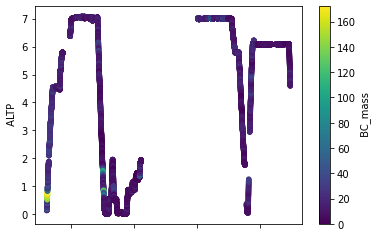

In [20]:
# _r on the colormap reverses. So viridis and viridis_r both work
naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass', colormap='viridis')

A list of the available colormaps can be found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

A common parameter you may want to access are `vmax` and `vmin`. These don't change the values in your dataset, but they do change the which values correspond to which colors in your colormap.

<AxesSubplot:xlabel=' Fractional_Day', ylabel=' ALTP'>

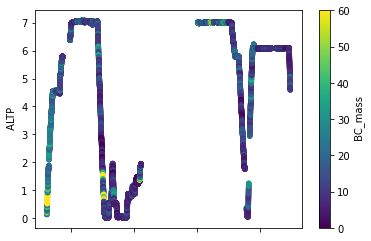

In [27]:
naames.plot.scatter(x=' Fractional_Day', y=' ALTP', c=' BC_mass', colormap='viridis', vmax=60)

It is possible to have your colorbar have a log colormap, you just have to switch into matplotlib.

In [24]:
import matplotlib.colors

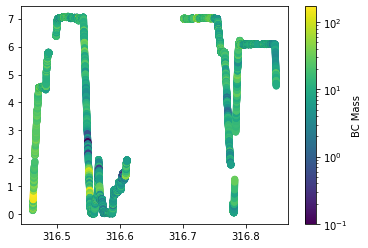

In [26]:
plt.scatter(naames[' Fractional_Day'], naames[' ALTP'], c=naames[' BC_mass'],
                    cmap='viridis', norm=matplotlib.colors.LogNorm())

plt.colorbar(label='BC Mass')

## Code Summary

### Preprocessing

In [23]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
naames = pd.read_csv('./data/naames-mrg01-c130_merge_20151112_R5_thru20151114.csv', skiprows=223)
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]
# Remove NaN values
naames = naames.replace({-999999: np.nan})
# Create geodataframe
naames_gpd = gpd.GeoDataFrame(naames, 
                            geometry=gpd.points_from_xy(naames[' LONGITUDE'], naames[' LATITUDE']), 
                            crs='epsg:4326')

### Mapping

#### Using `geopandas`

In [ ]:
fig = plt.figure()
ax = plt.axes()

naames_gpd.plot(ax=ax, column=' ALTP')

#### Using `cartopy`

In [ ]:
# Recreate the plot with the projection as an argument
fig = plt.figure()
ax = plt.axes(projection=crs)

# Add the data
naames_platecarree.plot(ax=ax, column=' ALTP')

# Change the field of view
ax.set_extent([-63, -38, 45, 57])
# Add labels and gridlines
ax.gridlines(crs=crs, color='grey', linestyle='--', draw_labels=True)
# ax.gridlines(crs=crs, color='#', linestyle='--', draw_labels=True)

# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add a title
ax.set_title('Flight Track Altitude')

### Colors